#Installing Dependencies

In [1]:
!pip install scipy

#Mounting the Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing the necessary machine learning and visualisation libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from scipy.stats import skewnorm
import missingno as msno
from sklearn.model_selection import train_test_split
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn import tree
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [4]:
df = pd.read_csv("/content/drive/MyDrive/AI-assignment/Breast_Cancer.csv")

# Exploratory Data Analysis: Questions for my dataset **analysis**

1. What is the dimensionality of our dataset?

2. What are the range our each of our variables?

3. How many records do we have for each varible?

4. What are the data types of the different variables?

5. What are the 'level of measurement' we have have for each feature?

6. Can the categorical features be encoded?

7. Are features balanced?

8. How do the features collerate with each other?

9. How do the features collerate with the target and is it strongly or weakly?

10. What is the centeral tendency of each feature (mean, mode, median)?

11. Are there missing values?

12. Will we need to transform /
scale numeric values?

13. Are there outliers?

In [5]:
#Our Breast cancer datset in the form of a dataframe
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [6]:
#What are the the data types of the features in the orignal dataset?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [7]:
#Are there any missing values?
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [8]:
#What is the dimensionality of our dataset?
df.shape

(4024, 16)

In [9]:
#What the data types our features/variables?
df.dtypes

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object

#What are the 'level of measurement' for each feature?
Level of measurements:

Age - Ratio

Race - Nominal

Marital Status - categorical

T Stage - Ordinal

N Stage - Ordinal

6th Stage - Orinal

Differntiate - Ordinal

Grade - Ratio

A stage - Dichotomous

Tumor size - Ratio

Estrogen Status - Dichotomous

Progesterone Status - Dichotomous

Regional Node examined - Ratio

Reginal Node postive - Ratio

Survival Months - Ratio

Status - Dichotomous



In [10]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [11]:
df.tail()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive
4023,46,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,7,2,100,Alive


In [12]:
#What are the range our each of our variables?

#To find the range please look at the minimum and maximum number for each variable.

#How many records do we have for each varible?

#Please look at the count for variable.

#what is the centeral tendency of each feature (mean, mode, median)?

# Please look at 'mean' for the mean of the varibles
# Please look at 'top' and 'freq' for the mode of the variables
# Please look at '50%' for the median  of the variables

df.describe(include='all')

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
count,4024.000000,4024,4024,4024,4024,4024,4024,4024,4024,4024.000000,4024,4024,4024.000000,4024.000000,4024.000000,4024
unique,NaN,3,5,4,3,5,4,4,2,NaN,2,2,NaN,NaN,NaN,2
top,NaN,White,Married,T2,N1,IIA,Moderately differentiated,2,Regional,NaN,Positive,Positive,NaN,NaN,NaN,Alive
freq,NaN,3413,2643,1786,2732,1305,2351,2351,3932,NaN,3755,3326,NaN,NaN,NaN,3408
mean,53.972167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.473658,NaN,NaN,14.357107,4.158052,71.297962,NaN
std,8.963134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.119696,NaN,NaN,8.099675,5.109331,22.921430,NaN
min,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,NaN,9.000000,1.000000,56.000000,NaN
50%,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,14.000000,2.000000,73.000000,NaN
75%,61.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,NaN,19.000000,5.000000,90.000000,NaN


In [13]:
#Checking the duplicated records
#we only have 1 record duplicated
df[df.duplicated()]

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
436,63,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,17,Positive,Positive,9,1,56,Alive


#Dealing with duplicate values

In [14]:
#Eliminating the duplicate
df = df.drop_duplicates()

In [15]:
df[df.duplicated()]

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status


#Univariant Analysis:

In [187]:
#What are the unique values in each column?

cols = ['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status']

for i in cols:
  print(f"""{i.strip()}: {df[i].unique()}
        """)


Age: [50 58 47 51 68 65 48 61 56 43 60 57 55 46 66 53 59 54 49 64 62 37 42 67
 40 52 31 33 63 38 45 39 36 69 44 41 34 35 30 32]
        
Race: ['White' 'Black' 'Other']
        
Marital Status: ['Married' 'Single ' 'Widowed' 'Divorced' 'Separated']
        
T Stage: ['T2' 'T1' 'T3' 'T4']
        
N Stage: ['N2' 'N1' 'N3']
        
6th Stage: ['IIIA' 'IIA' 'IIB' 'IIIB' 'IIIC']
        
differentiate: ['Moderately differentiated' 'Poorly differentiated' 'Well differentiated'
 'Undifferentiated']
        
Grade: ['2' '3' '1' ' anaplastic; Grade IV']
        
A Stage: ['Regional' 'Distant']
        
Tumor Size: [35 18 41 20 13 15 19 46 24 25 29 30 40 17 21 10 27 23 51 11 12 26 50 22
 14 16 45 38 34 37 32 28 48 42 31 47 36 33 43 49 39 44]
        
Estrogen Status: ['Positive' 'Negative']
        
Progesterone Status: ['Positive' 'Negative']
        
Regional Node Examined: [14  2  3 18  9 13 23 20  1 22 16 15  4 10  5  6 19 21 12 17 24 11  7 25
  8 28 27 26]
        
Reginol Node Positive: 

In [17]:
#Are features balanced?
df['Status'].value_counts()

#No, but we will over sample minority class 'Dead' to balance it using SMOTE.

Alive    3407
Dead      616
Name: Status, dtype: int64

<Axes: xlabel='Status', ylabel='count'>

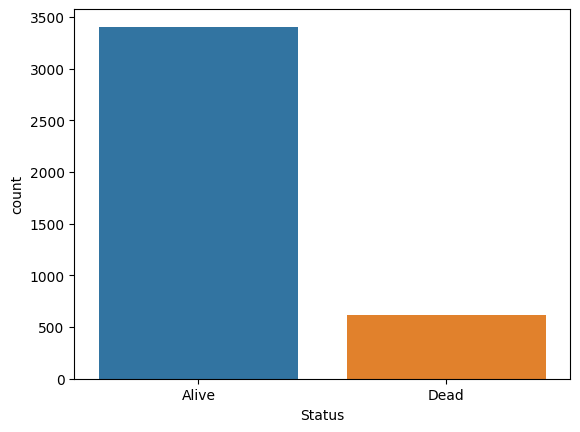

In [18]:
sns.countplot(x = 'Status', data=df)

<Axes: xlabel='Race', ylabel='count'>

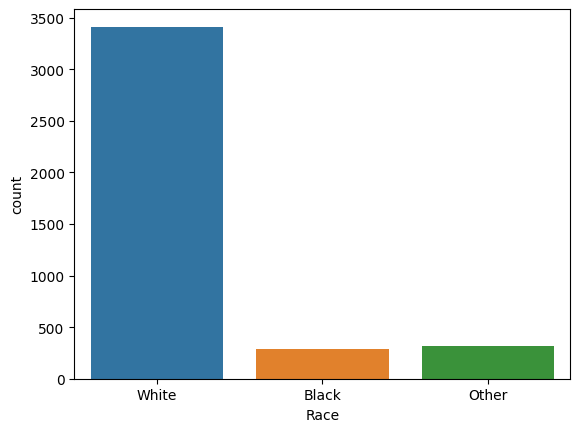

In [19]:
sns.countplot(x = 'Race', data=df)

<Axes: xlabel='Marital Status', ylabel='count'>

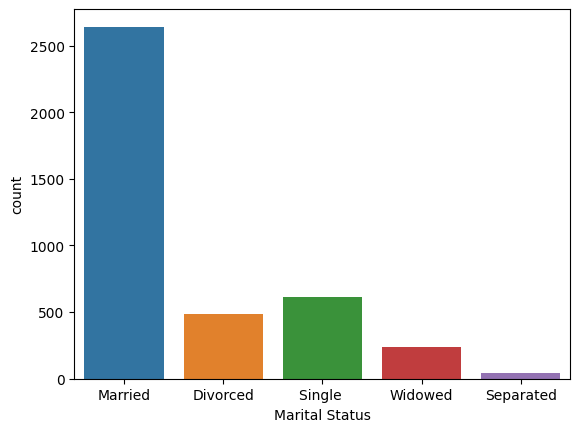

In [20]:
sns.countplot(x = 'Marital Status', data=df)

<Axes: xlabel='A Stage', ylabel='count'>

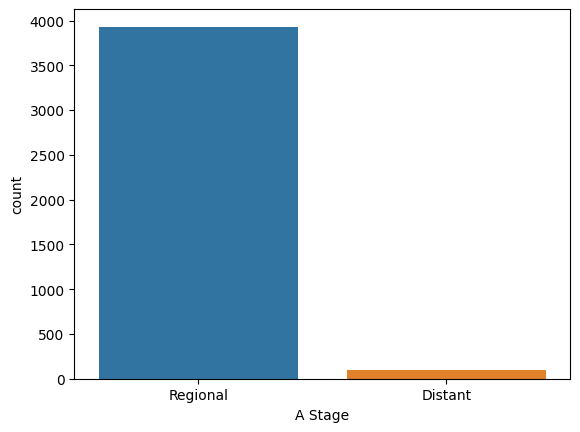

In [21]:
sns.countplot(x = 'A Stage', data=df)

<Axes: xlabel='Estrogen Status', ylabel='count'>

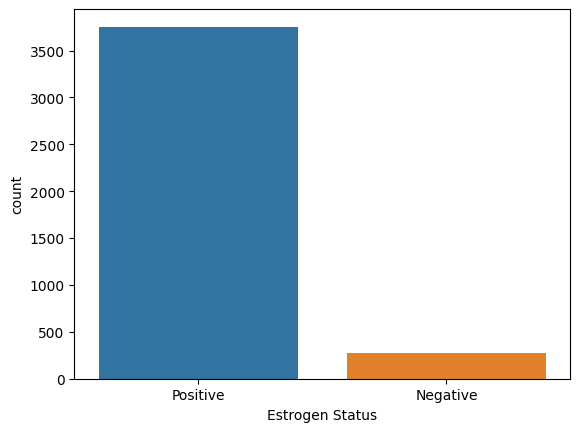

In [22]:
sns.countplot(x = 'Estrogen Status', data=df)

<Axes: xlabel='Progesterone Status', ylabel='count'>

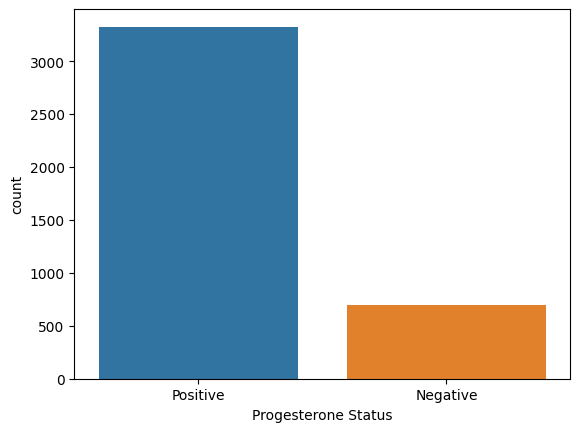

In [23]:
sns.countplot(x = 'Progesterone Status', data=df)

<Axes: xlabel='Grade', ylabel='count'>

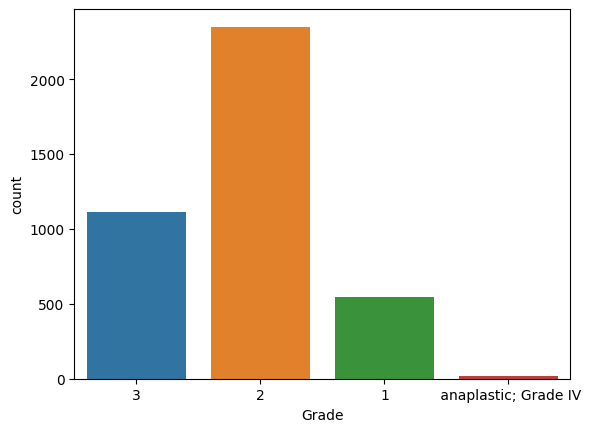

In [24]:
sns.countplot(x = 'Grade', data=df)

<Axes: xlabel='T Stage ', ylabel='count'>

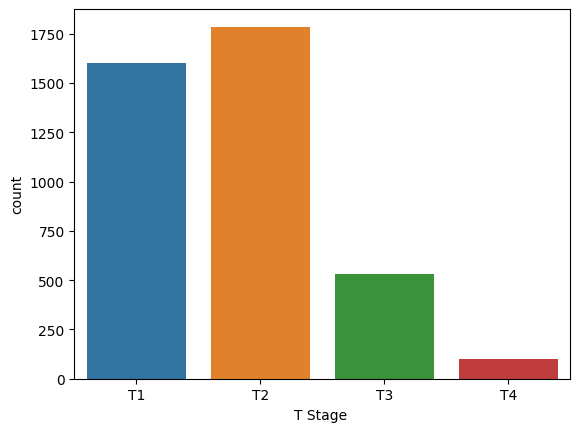

In [25]:
sns.countplot(x = 'T Stage ', data=df)

<Axes: xlabel='N Stage', ylabel='count'>

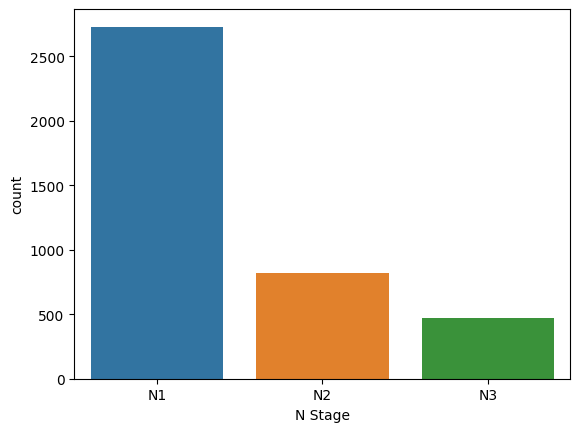

In [26]:
sns.countplot(x = 'N Stage', data=df)

<Axes: xlabel='6th Stage', ylabel='count'>

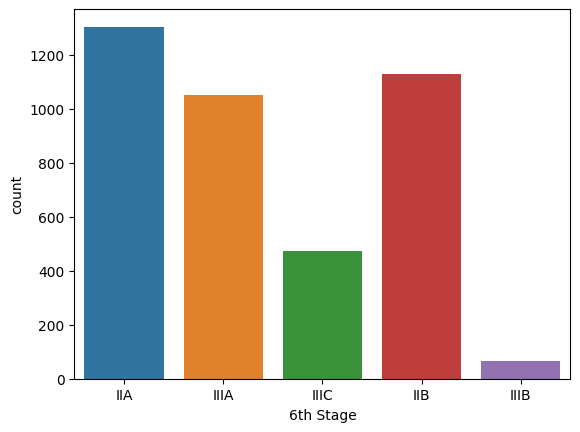

In [27]:
sns.countplot(x = '6th Stage', data=df)

<Axes: xlabel='differentiate', ylabel='count'>

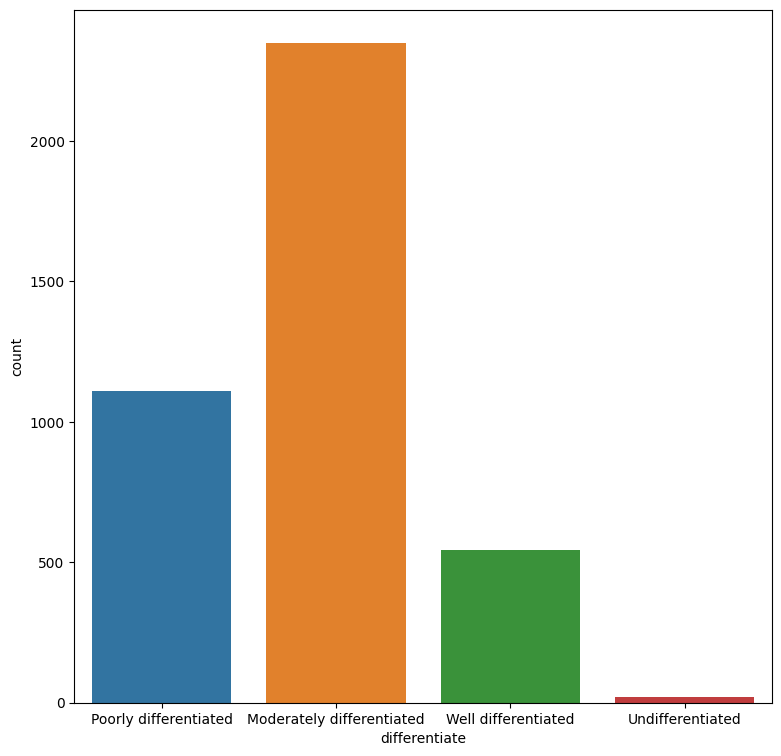

In [28]:
plt.figure(figsize=(9,9))
sns.countplot(x = 'differentiate', data=df)

<Axes: xlabel='Age', ylabel='Count'>

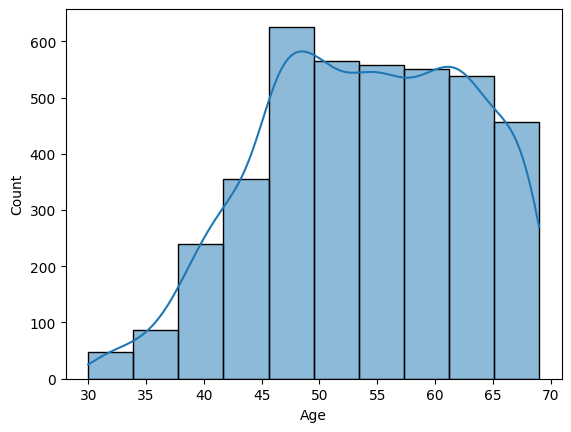

In [29]:
sns.histplot(x='Age', data = df, bins = 10, kde = True)

<Axes: xlabel='Tumor Size', ylabel='Count'>

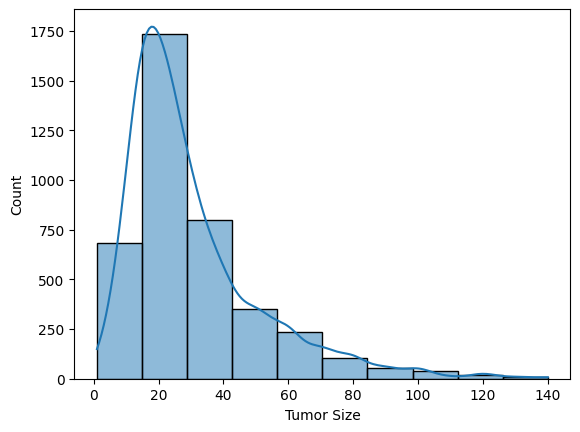

In [30]:

sns.histplot(x='Tumor Size', data = df, bins = 10, kde = True)

<Axes: xlabel='Regional Node Examined', ylabel='Count'>

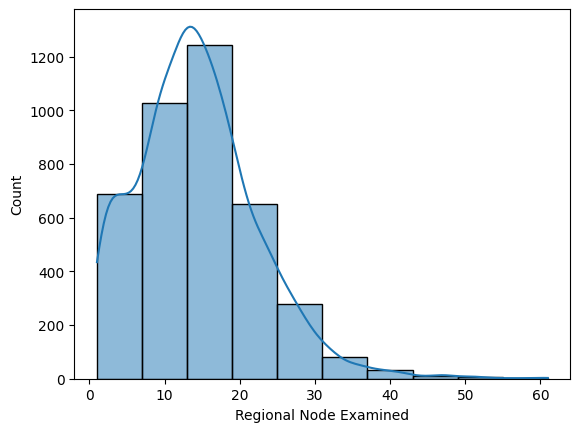

In [31]:
sns.histplot(x='Regional Node Examined', data = df, bins = 10, kde = True)

<Axes: xlabel='Reginol Node Positive', ylabel='Count'>

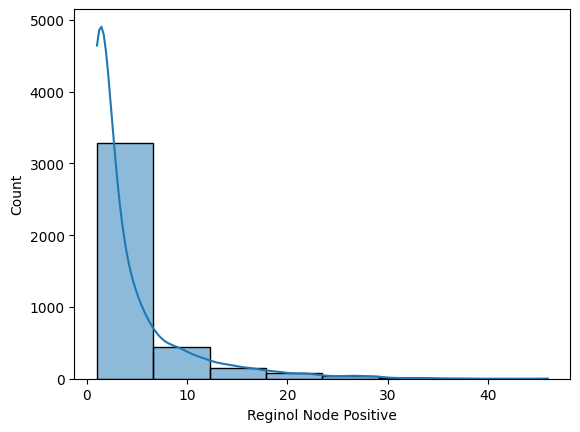

In [32]:
sns.histplot(x='Reginol Node Positive', data = df, bins = 8, kde = True)

<Axes: xlabel='Survival Months', ylabel='Count'>

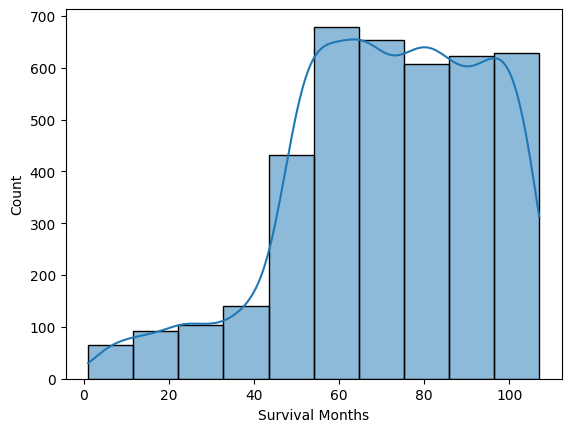

In [33]:
sns.histplot(x='Survival Months', data = df, bins = 10, kde = True)

##Measuring the Dispersion of Data


In [188]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,2647.000000,2647.000000,2647.000000,2647.000000,2647.000000
mean,54.030223,24.039290,12.691349,2.368719,75.173404
std,8.882316,10.189139,6.553715,1.783875,18.758011
min,30.000000,10.000000,1.000000,1.000000,29.000000
25%,47.000000,16.000000,8.000000,1.000000,60.000000
50%,54.000000,22.000000,13.000000,2.000000,76.000000
75%,61.000000,30.000000,17.000000,3.000000,91.000000
max,69.000000,51.000000,28.000000,8.000000,107.000000


#Are there outliers?

<Axes: >

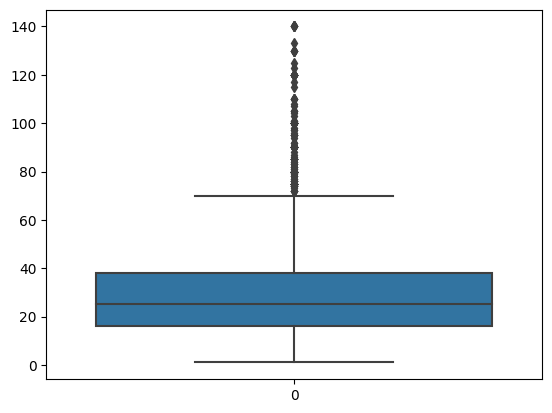

In [35]:
sns.boxplot(df['Tumor Size'])

<Axes: >

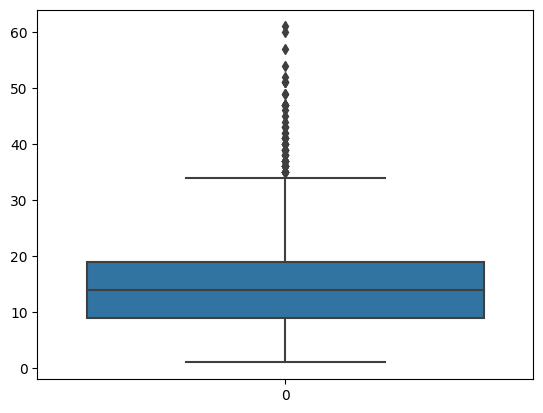

In [36]:
sns.boxplot(df['Regional Node Examined'])

<Axes: >

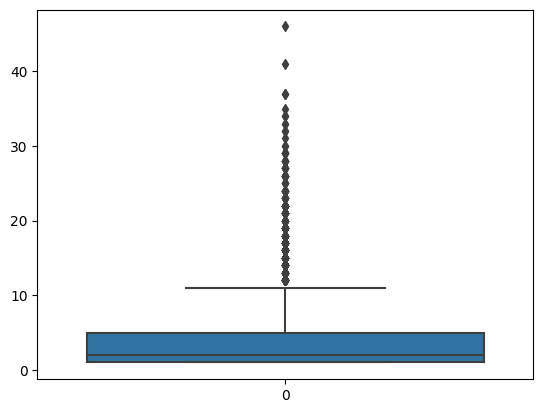

In [37]:
sns.boxplot(df['Reginol Node Positive'])

<Axes: >

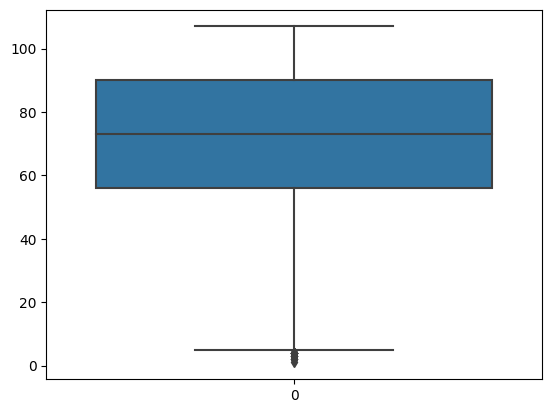

In [38]:
sns.boxplot(df['Survival Months'])

#Dealing with outliers

In [39]:
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [40]:
outlier_columns = ["Tumor Size","Reginol Node Positive"]

for i in outlier_columns:
  upper_limit = df[i].mean() + 1*df[i].std()
  lower_limit = df[i].mean() - 1*df[i].std()

  df_outliers = df.loc[(df[i] > upper_limit) | (df[i] < lower_limit)]
  array_to_drop = df_outliers.index.to_numpy()

  for row_index in array_to_drop:
    df = df.drop(row_index)


df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
5,51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive
7,40,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,9,1,14,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4018,64,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,10,Positive,Positive,11,1,70,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [41]:
outlier_columns = ["Regional Node Examined","Survival Months"]

for i in outlier_columns:
  upper_limit = df[i].mean() + 2*df[i].std()
  lower_limit = df[i].mean() - 2*df[i].std()

  df_outliers = df.loc[(df[i] > upper_limit) | (df[i] < lower_limit)]
  array_to_drop = df_outliers.index.to_numpy()

  for row_index in array_to_drop:
    df = df.drop(row_index)


df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
5,51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive
10,68,White,Widowed,T1,N1,IIA,Moderately differentiated,2,Regional,13,Positive,Positive,9,1,64,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4018,64,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,10,Positive,Positive,11,1,70,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


#Spliting original dataframe into predictors(x) variables and target(y) variable

In [42]:
x = df.drop(columns=['Status'], axis=1)
x.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50
5,51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89
10,68,White,Widowed,T1,N1,IIA,Moderately differentiated,2,Regional,13,Positive,Positive,9,1,64


In [43]:
y= df['Status']
y.head()

1     Alive
3     Alive
4     Alive
5     Alive
10     Dead
Name: Status, dtype: object

##Spliting the data using train_test_split method and creating train dataset and test dataset

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [45]:
df_train = x_train
df_train['Status'] = y_train
df_train.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
438,61,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,25,Positive,Positive,25,3,97,Alive
1832,56,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,6,1,95,Alive
1235,40,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,28,Negative,Negative,9,2,50,Alive
1989,50,White,Widowed,T2,N2,IIIA,Poorly differentiated,3,Regional,30,Positive,Positive,7,6,73,Alive
3168,63,White,Single,T1,N1,IIA,Poorly differentiated,3,Regional,10,Positive,Positive,2,1,68,Alive


#Multi-variant Analysis

<Axes: xlabel='Age', ylabel='Status'>

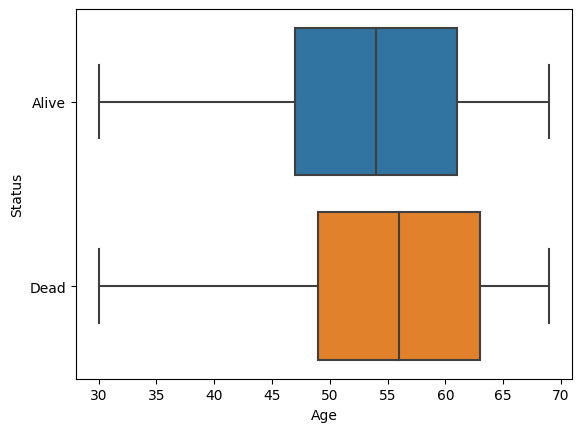

In [46]:
sns.boxplot(data = df_train, x = df_train['Age'], y= df_train['Status'])

<Axes: xlabel='Tumor Size', ylabel='Status'>

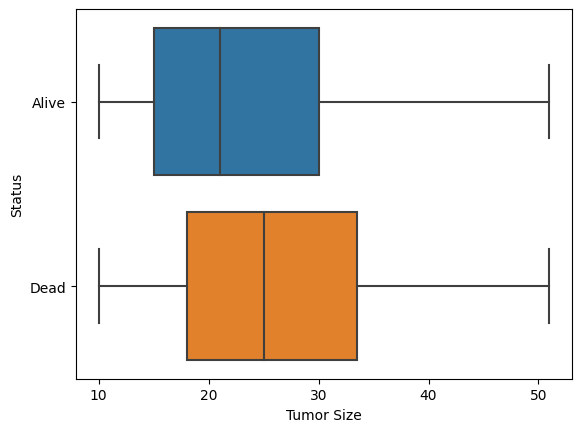

In [47]:
sns.boxplot(data = df_train, x = df_train['Tumor Size'], y= df_train['Status'])

<Axes: xlabel='Survival Months', ylabel='Status'>

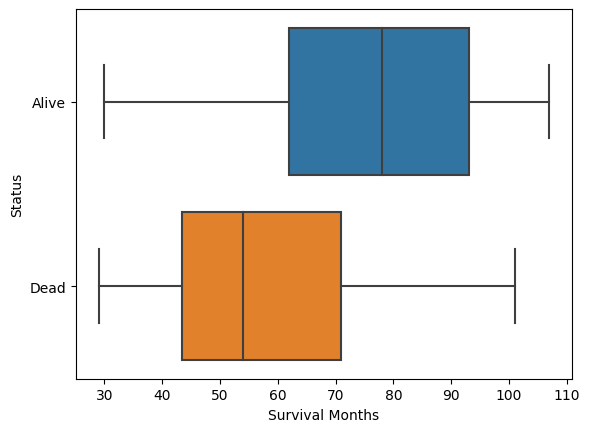

In [48]:
sns.boxplot(data = df_train, x = df_train['Survival Months'], y= df_train['Status'])

<Axes: xlabel='Tumor Size', ylabel='Grade'>

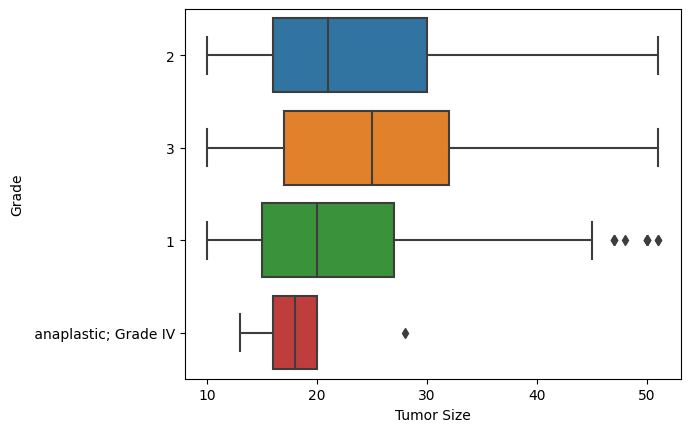

In [49]:
sns.boxplot(data = df_train, x = df_train['Tumor Size'], y= df_train['Grade'])

<Axes: xlabel='Regional Node Examined', ylabel='Status'>

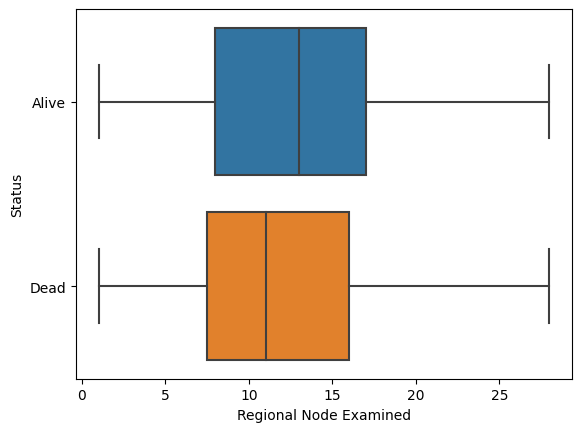

In [50]:
sns.boxplot(data = df_train, x = df_train['Regional Node Examined'], y= df_train['Status'])

<Axes: xlabel='Reginol Node Positive', ylabel='Status'>

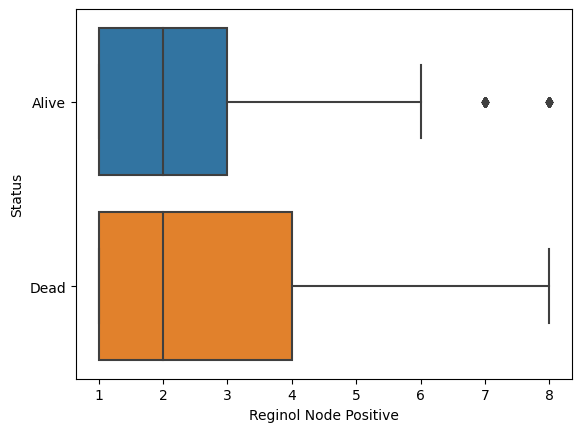

In [51]:
sns.boxplot(data = df_train, x = df_train['Reginol Node Positive'], y= df_train['Status'])

<Axes: xlabel='Tumor Size', ylabel='Race'>

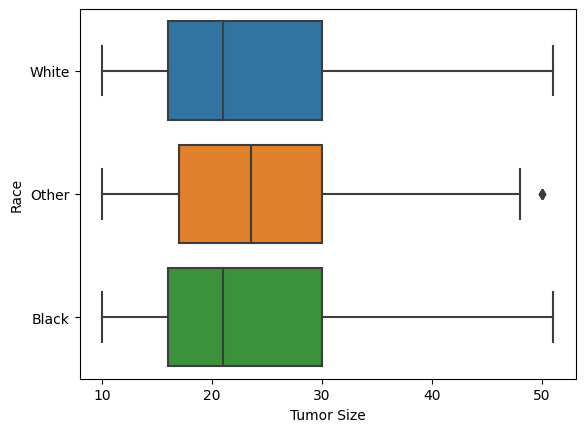

In [52]:
sns.boxplot(data = df_train, x = df_train['Tumor Size'], y= df_train['Race'])

<Axes: xlabel='Age', ylabel='Survival Months'>

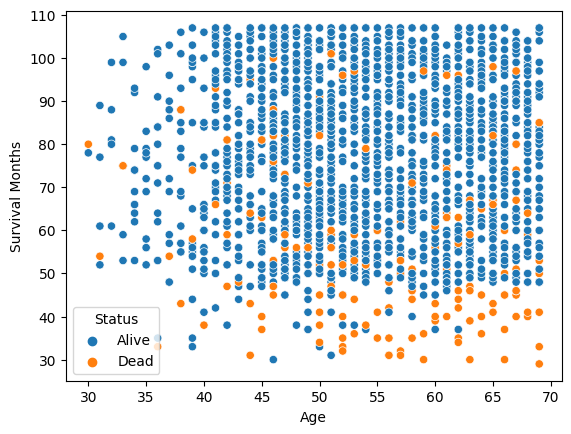

In [53]:
sns.scatterplot(x ='Age',  y ='Survival Months',
                hue='Status', data=df_train)

<Axes: xlabel='Survival Months', ylabel='Tumor Size'>

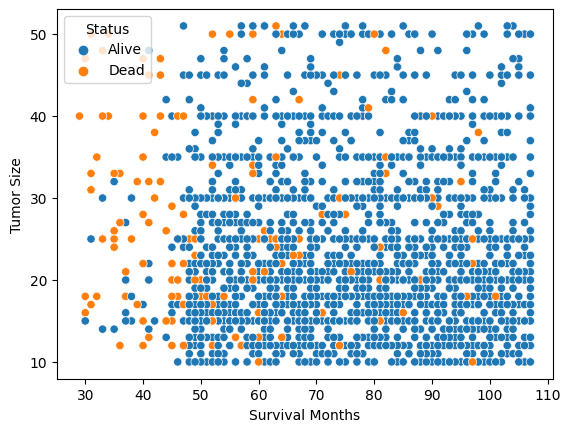

In [54]:
sns.scatterplot(x ='Survival Months',  y ='Tumor Size',
                hue='Status', data=df_train)

<Axes: xlabel='Survival Months', ylabel='Regional Node Examined'>

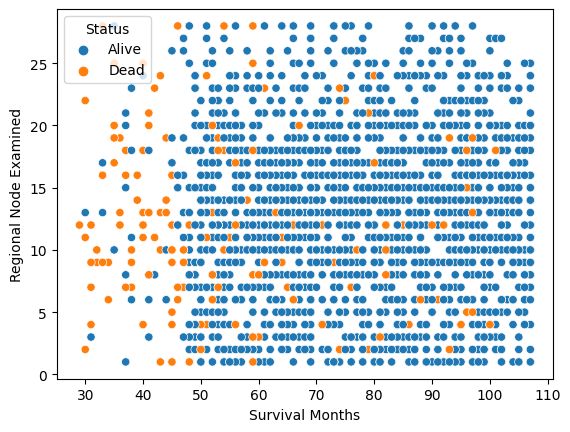

In [55]:
sns.scatterplot(y ='Regional Node Examined',  x ='Survival Months',
                hue='Status', data=df_train)

#Label encoding: Can the categorical features be encoded?

Will we need to transform /scale numeric values?

##Encoding train set

In [56]:
le = LabelEncoder()

df_train['Race'] = le.fit_transform(df_train['Race'])
df_train['Marital Status'] = le.fit_transform(df_train['Marital Status'])
df_train['T Stage '] = le.fit_transform(df_train['T Stage '])
df_train['N Stage'] = le.fit_transform(df_train['N Stage'])
df_train['6th Stage'] = le.fit_transform(df_train['6th Stage'])
df_train['differentiate'] = le.fit_transform(df_train['differentiate'])
df_train['Grade'] = le.fit_transform(df_train['Grade'])
df_train['A Stage'] = le.fit_transform(df_train['A Stage'])
df_train['Estrogen Status'] = le.fit_transform(df_train['Estrogen Status'])
df_train['Progesterone Status'] = le.fit_transform(df_train['Progesterone Status'])
df_train['Status'] = le.fit_transform(df_train['Status'])

In [57]:
x_train = df_train.drop(columns=['Status'])
y_train = df_train['Status']

In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 438 to 1338
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     2117 non-null   int64
 1   Race                    2117 non-null   int64
 2   Marital Status          2117 non-null   int64
 3   T Stage                 2117 non-null   int64
 4   N Stage                 2117 non-null   int64
 5   6th Stage               2117 non-null   int64
 6   differentiate           2117 non-null   int64
 7   Grade                   2117 non-null   int64
 8   A Stage                 2117 non-null   int64
 9   Tumor Size              2117 non-null   int64
 10  Estrogen Status         2117 non-null   int64
 11  Progesterone Status     2117 non-null   int64
 12  Regional Node Examined  2117 non-null   int64
 13  Reginol Node Positive   2117 non-null   int64
 14  Survival Months         2117 non-null   int64
 15  Status             

In [59]:
df_train.describe()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
count,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.00000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000
mean,54.065187,1.778932,1.383562,0.571091,0.204535,0.836089,0.698630,2.109117,0.994804,23.89419,0.950874,0.855456,12.708077,2.369391,75.421823,0.092111
std,8.866927,0.561249,1.065117,0.567117,0.416142,0.808194,1.042057,0.633722,0.071913,10.06966,0.216182,0.351724,6.593790,1.786202,18.737873,0.289252
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.00000,0.000000,0.000000,1.000000,1.000000,29.000000,0.000000
25%,47.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,16.00000,1.000000,1.000000,8.000000,1.000000,60.000000,0.000000
50%,54.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,22.00000,1.000000,1.000000,13.000000,2.000000,76.000000,0.000000
75%,61.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.000000,30.00000,1.000000,1.000000,17.000000,3.000000,91.000000,0.000000
max,69.000000,2.000000,4.000000,3.000000,2.000000,4.000000,3.000000,3.000000,1.000000,51.00000,1.000000,1.000000,28.000000,8.000000,107.000000,1.000000


#Variables Correlation

###How do the features collerate with each other?
###How do the features collerate with the target and is it strongly or weakly?


In [60]:
df_train_corr = df_train.corr(method= 'pearson')
df_train_corr

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
Age,1.000000,0.101469,0.068758,-0.041992,-0.018472,-0.050013,0.038186,-0.125150,0.004978,-0.077205,0.055664,0.004386,-0.054922,-0.034374,-0.026419,0.048698
Race,0.101469,1.000000,-0.092094,-0.017415,-0.043054,-0.042415,-0.039628,-0.070333,0.006654,-0.039596,0.054565,0.039150,-0.039922,-0.043900,-0.002318,-0.017152
Marital Status,0.068758,-0.092094,1.000000,-0.004480,0.027634,0.000053,0.033089,-0.022126,0.050712,0.019516,-0.024854,-0.012148,0.033917,0.047707,0.004605,0.029460
T Stage,-0.041992,-0.017415,-0.004480,1.000000,0.145616,0.677600,-0.022906,0.100040,-0.147375,0.737511,-0.040885,-0.014799,0.059516,0.177005,-0.027394,0.094026
N Stage,-0.018472,-0.043054,0.027634,0.145616,1.000000,0.779829,-0.064851,0.085574,-0.185557,0.184260,-0.045852,-0.027162,0.155937,0.793497,-0.031919,0.094682
6th Stage,-0.050013,-0.042415,0.000053,0.677600,0.779829,1.000000,-0.062049,0.118905,-0.242338,0.541987,-0.062339,-0.021874,0.148781,0.650869,-0.039246,0.113134
differentiate,0.038186,-0.039628,0.033089,-0.022906,-0.064851,-0.062049,1.000000,-0.396739,-0.008293,-0.027451,-0.015403,0.013901,-0.040803,-0.075492,0.011814,-0.028587
Grade,-0.125150,-0.070333,-0.022126,0.100040,0.085574,0.118905,-0.396739,1.000000,-0.039403,0.108009,-0.167828,-0.130628,0.064967,0.076682,-0.008176,0.094676
A Stage,0.004978,0.006654,0.050712,-0.147375,-0.185557,-0.242338,-0.008293,-0.039403,1.000000,-0.024907,0.044371,-0.011023,-0.020143,-0.010805,-0.015909,-0.022419
Tumor Size,-0.077205,-0.039596,0.019516,0.737511,0.184260,0.541987,-0.027451,0.108009,-0.024907,1.000000,-0.041032,-0.064900,0.073515,0.225010,-0.030954,0.093398


<function matplotlib.pyplot.show(close=None, block=None)>

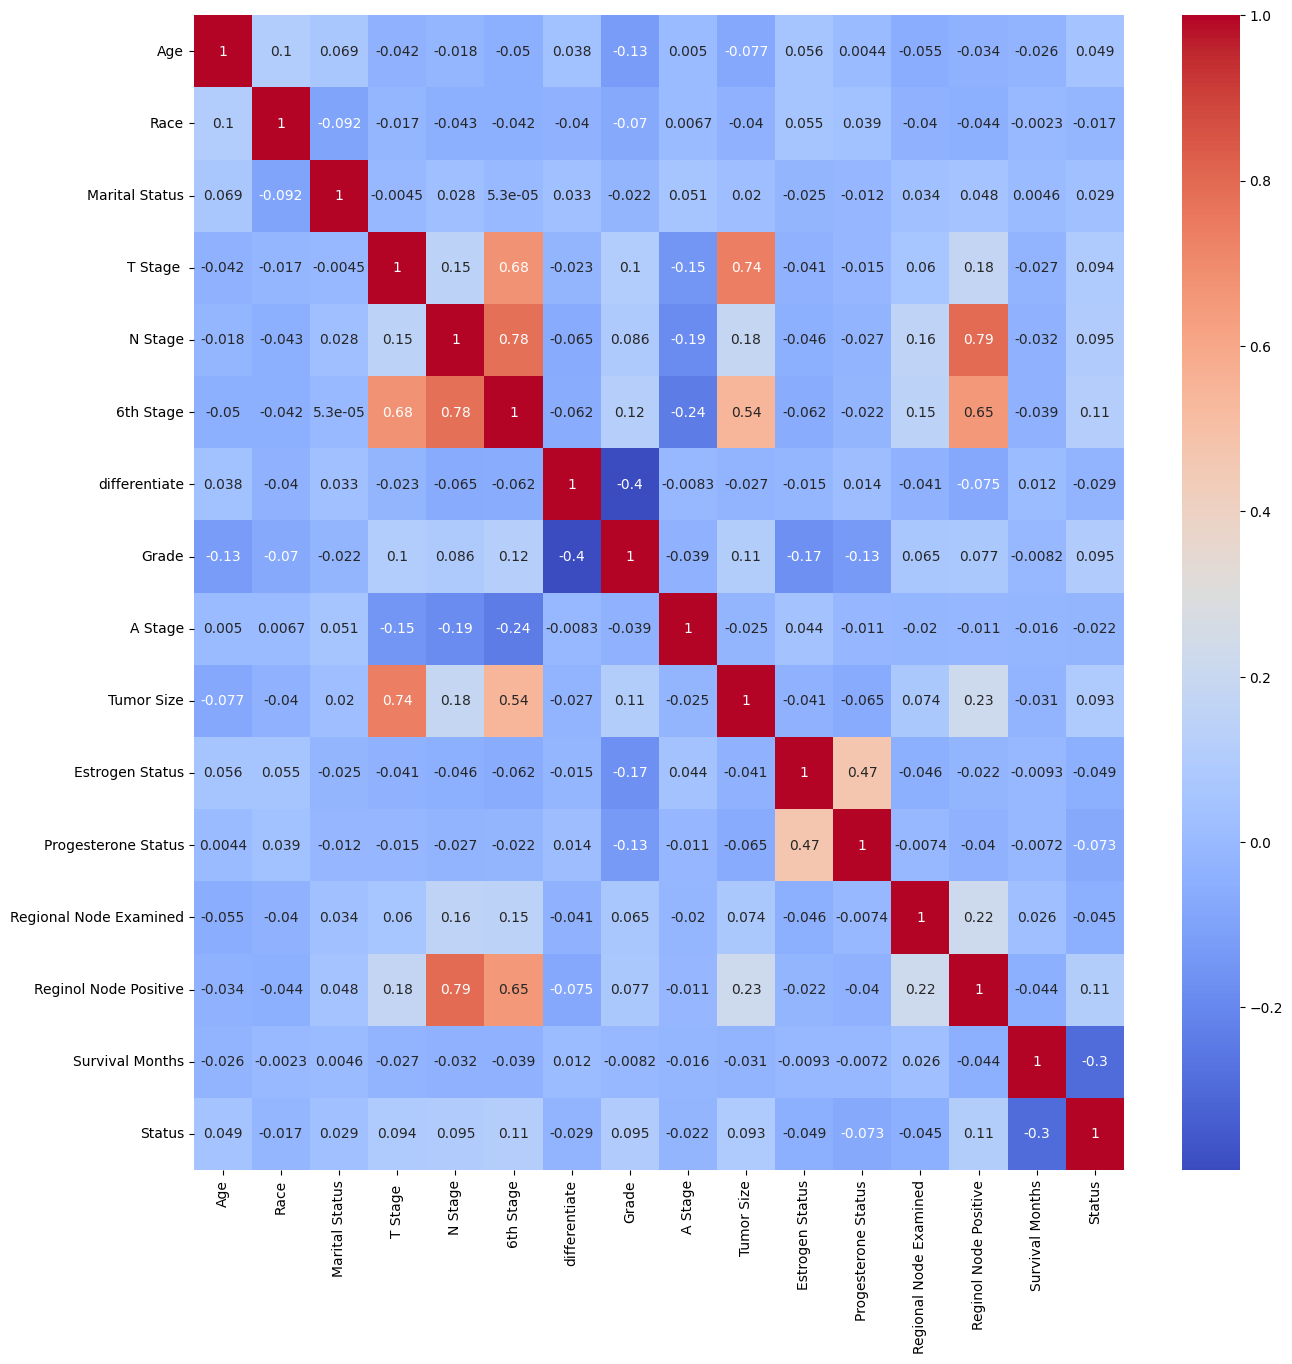

In [61]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train_corr, annot=True, cmap= 'coolwarm' )
plt.show

#Balancing our data of the original dataset in the original data frame.

##Balancing our taining data in the training set

In [62]:
df_train['Status'].value_counts()

0    1922
1     195
Name: Status, dtype: int64

In [63]:
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)
df_train = df.drop(df.index)
df_train = x_train
df_train['Status'] = y_train

In [64]:
df_train['Status'].value_counts()

0    1922
1    1922
Name: Status, dtype: int64

#Scaling the training set data using standardisation
## by StandardScaler


In [65]:
df_train

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,61,2,1,1,0,1,0,2,1,25,1,1,25,3,97,0
1,56,2,1,0,0,0,0,2,1,20,1,1,6,1,95,0
2,40,2,1,1,0,1,1,3,1,28,0,0,9,2,50,0
3,50,2,4,1,1,2,1,3,1,30,1,1,7,6,73,0
4,63,2,3,0,0,0,1,3,1,10,1,1,2,1,68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3839,59,1,1,1,0,1,1,2,1,47,1,1,18,6,33,1
3840,57,2,1,0,0,1,1,3,1,13,1,1,6,2,58,1
3841,64,2,0,0,0,0,0,2,1,20,1,1,4,1,79,1
3842,52,2,1,0,0,0,0,2,1,17,1,1,10,3,32,1


In [66]:
standard_scaler = StandardScaler()

x_train_scaled = standard_scaler.fit_transform(x_train)
df_train = df_train.drop(df_train.index)

df_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)

df_train = df_train.drop(columns=['Status'])
df_train['Status'] = y_train

x_train = x_train.drop(x_train.index)
x_train = df_train.drop(columns = ['Status'])

In [67]:
df_train

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,0.729211,0.444330,-0.276930,0.751985,-0.448903,0.217662,-0.608045,-0.118008,0.098585,0.020530,0.328300,0.576149,2.110492,0.322863,1.442010,0
1,0.147585,0.444330,-0.276930,-1.064879,-0.448903,-1.099966,-0.608045,-0.118008,0.098585,-0.472708,0.328300,0.576149,-0.969266,-0.838658,1.345353,0
2,-1.713616,0.444330,-0.276930,0.751985,-0.448903,0.217662,0.508156,1.537552,0.098585,0.316473,-3.045993,-1.735663,-0.482988,-0.257897,-0.829410,0
3,-0.550365,0.444330,2.767453,0.751985,2.142064,1.535290,0.508156,1.537552,0.098585,0.513769,0.328300,0.576149,-0.807174,2.065144,0.282136,0
4,0.961861,0.444330,1.752659,-1.064879,-0.448903,-1.099966,0.508156,1.537552,0.098585,-1.459185,0.328300,0.576149,-1.617636,-0.838658,0.040496,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3839,0.496560,-1.226907,-0.276930,0.751985,-0.448903,0.217662,0.508156,-0.118008,0.098585,2.190779,0.328300,0.576149,0.975844,2.065144,-1.650987,1
3840,0.263910,0.444330,-0.276930,-1.064879,-0.448903,0.217662,0.508156,1.537552,0.098585,-1.163242,0.328300,0.576149,-0.969266,-0.257897,-0.442785,1
3841,1.078186,0.444330,-1.291725,-1.064879,-0.448903,-1.099966,-0.608045,-0.118008,0.098585,-0.472708,0.328300,0.576149,-1.293451,-0.838658,0.572104,1
3842,-0.317715,0.444330,-0.276930,-1.064879,-0.448903,-1.099966,-0.608045,-0.118008,0.098585,-0.768651,0.328300,0.576149,-0.320896,0.322863,-1.699315,1


In [68]:
df_train.describe(include='all')

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
count,3.844000e+03,3.844000e+03,3.844000e+03,3.844000e+03,3.844000e+03,3.844000e+03,3.844000e+03,3.844000e+03,3.844000e+03,3.844000e+03,3.844000e+03,3.844000e+03,3.844000e+03,3.844000e+03,3.844000e+03,3844.000000
mean,2.957514e-17,1.404819e-16,1.035130e-16,1.293912e-17,-6.654406e-17,-1.432546e-17,1.478757e-17,2.883576e-16,4.066582e-17,-6.654406e-17,-8.872542e-17,2.957514e-17,2.957514e-17,-6.284717e-17,-1.774508e-16,0.500000
std,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,0.500065
min,-2.876867e+00,-2.898144e+00,-1.291725e+00,-1.064879e+00,-4.489033e-01,-1.099966e+00,-6.080454e-01,-3.429129e+00,-1.014356e+01,-1.459185e+00,-3.045993e+00,-1.735663e+00,-1.779729e+00,-8.386577e-01,-1.844299e+00,0.000000
25%,-7.830154e-01,4.443299e-01,-2.769301e-01,-1.064879e+00,-4.489033e-01,-1.099966e+00,-6.080454e-01,-1.180082e-01,9.858468e-02,-7.686511e-01,3.283001e-01,5.761487e-01,-6.450810e-01,-8.386577e-01,-8.294098e-01,0.000000
50%,3.126009e-02,4.443299e-01,-2.769301e-01,7.519848e-01,-4.489033e-01,2.176623e-01,-6.080454e-01,-1.180082e-01,9.858468e-02,-1.767651e-01,3.283001e-01,5.761487e-01,-1.588034e-01,-2.578974e-01,-1.044887e-01,0.500000
75%,8.455356e-01,4.443299e-01,-2.769301e-01,7.519848e-01,-4.489033e-01,2.176623e-01,5.081564e-01,-1.180082e-01,9.858468e-02,6.124162e-01,3.283001e-01,5.761487e-01,6.516592e-01,3.228628e-01,8.137446e-01,1.000000
max,1.659811e+00,4.443299e-01,2.767453e+00,4.385712e+00,4.733031e+00,4.170546e+00,2.740560e+00,1.537552e+00,9.858468e-02,2.585370e+00,3.283001e-01,5.761487e-01,2.596769e+00,3.226664e+00,1.925290e+00,1.000000


In [69]:
df_test = x_test
df_test['Status'] = y_test
df_test.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
2606,65,White,Single,T2,N1,IIB,Well differentiated,1,Regional,32,Positive,Positive,2,1,80,Alive
1813,45,Black,Married,T1,N1,IIA,Moderately differentiated,2,Regional,18,Positive,Positive,4,1,71,Alive
1404,64,White,Married,T2,N1,IIB,Well differentiated,1,Regional,31,Positive,Positive,9,1,67,Alive
686,43,White,Single,T2,N1,IIB,Poorly differentiated,3,Regional,34,Positive,Positive,12,2,72,Alive
2178,49,White,Married,T2,N1,IIB,Well differentiated,1,Regional,24,Positive,Positive,23,3,50,Alive


## Encoding test set

In [70]:
df_test['Race'] = le.fit_transform(df_test['Race'])
df_test['Marital Status'] = le.fit_transform(df_test['Marital Status'])
df_test['T Stage '] = le.fit_transform(df_test['T Stage '])
df_test['N Stage'] = le.fit_transform(df_test['N Stage'])
df_test['6th Stage'] = le.fit_transform(df_test['6th Stage'])
df_test['differentiate'] = le.fit_transform(df_test['differentiate'])
df_test['Grade'] = le.fit_transform(df_test['Grade'])
df_test['A Stage'] = le.fit_transform(df_test['A Stage'])
df_test['Estrogen Status'] = le.fit_transform(df_test['Estrogen Status'])
df_test['Progesterone Status'] = le.fit_transform(df_test['Progesterone Status'])
df_test['Status'] = le.fit_transform(df_test['Status'])

In [71]:
x_test = df_test.drop(columns=['Status'])
y_test = df_test['Status']

In [72]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530 entries, 2606 to 2483
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     530 non-null    int64
 1   Race                    530 non-null    int64
 2   Marital Status          530 non-null    int64
 3   T Stage                 530 non-null    int64
 4   N Stage                 530 non-null    int64
 5   6th Stage               530 non-null    int64
 6   differentiate           530 non-null    int64
 7   Grade                   530 non-null    int64
 8   A Stage                 530 non-null    int64
 9   Tumor Size              530 non-null    int64
 10  Estrogen Status         530 non-null    int64
 11  Progesterone Status     530 non-null    int64
 12  Regional Node Examined  530 non-null    int64
 13  Reginol Node Positive   530 non-null    int64
 14  Survival Months         530 non-null    int64
 15  Status             

##Balancing our test data in the test set

In [73]:
df_test['Status'].value_counts()

0    483
1     47
Name: Status, dtype: int64

In [74]:
x_test, y_test= smote.fit_resample(x_test, y_test)
df_test = df.drop(df.index)
df_test = x_test
df_test['Status'] = y_test

In [75]:
df_test['Status'].value_counts()

0    483
1    483
Name: Status, dtype: int64

In [76]:
x_test

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,65,2,3,1,0,1,2,0,0,32,1,1,2,1,80,0
1,45,0,1,0,0,0,0,1,0,18,1,1,4,1,71,0
2,64,2,1,1,0,1,2,0,0,31,1,1,9,1,67,0
3,43,2,3,1,0,1,1,2,0,34,1,1,12,2,72,0
4,49,2,1,1,0,1,2,0,0,24,1,1,23,3,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,63,2,1,1,0,1,0,1,0,39,1,1,12,5,48,1
962,63,2,1,1,0,2,0,1,0,43,0,0,14,5,44,1
963,43,2,2,1,0,1,0,1,0,40,1,0,10,6,35,1
964,47,0,1,1,0,1,0,1,0,24,1,1,13,3,60,1


In [77]:
df_test.describe(include ='all')

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
count,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.0,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000
mean,55.625259,1.683230,1.257764,0.610766,0.133540,0.848861,0.364389,1.021739,0.0,25.854037,0.922360,0.696687,11.763975,2.393375,68.003106,0.500000
std,9.042120,0.636594,0.924517,0.559096,0.343365,0.696352,0.615630,0.543014,0.0,10.382549,0.267742,0.459927,6.092226,1.582455,19.900504,0.500259
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,10.000000,0.000000,0.000000,1.000000,1.000000,30.000000,0.000000
25%,49.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,18.000000,1.000000,0.000000,7.000000,1.000000,50.000000,0.000000
50%,57.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,24.000000,1.000000,1.000000,12.000000,2.000000,67.000000,0.500000
75%,63.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.0,33.000000,1.000000,1.000000,16.000000,3.000000,84.000000,1.000000
max,69.000000,2.000000,4.000000,3.000000,2.000000,4.000000,2.000000,2.000000,0.0,51.000000,1.000000,1.000000,28.000000,8.000000,107.000000,1.000000


In [78]:
df_test

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,65,2,3,1,0,1,2,0,0,32,1,1,2,1,80,0
1,45,0,1,0,0,0,0,1,0,18,1,1,4,1,71,0
2,64,2,1,1,0,1,2,0,0,31,1,1,9,1,67,0
3,43,2,3,1,0,1,1,2,0,34,1,1,12,2,72,0
4,49,2,1,1,0,1,2,0,0,24,1,1,23,3,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,63,2,1,1,0,1,0,1,0,39,1,1,12,5,48,1
962,63,2,1,1,0,2,0,1,0,43,0,0,14,5,44,1
963,43,2,2,1,0,1,0,1,0,40,1,0,10,6,35,1
964,47,0,1,1,0,1,0,1,0,24,1,1,13,3,60,1


#Scaling the Testing set data using standardisation
## by StandardScaler

In [79]:
x_test

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,65,2,3,1,0,1,2,0,0,32,1,1,2,1,80,0
1,45,0,1,0,0,0,0,1,0,18,1,1,4,1,71,0
2,64,2,1,1,0,1,2,0,0,31,1,1,9,1,67,0
3,43,2,3,1,0,1,1,2,0,34,1,1,12,2,72,0
4,49,2,1,1,0,1,2,0,0,24,1,1,23,3,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,63,2,1,1,0,1,0,1,0,39,1,1,12,5,48,1
962,63,2,1,1,0,2,0,1,0,43,0,0,14,5,44,1
963,43,2,2,1,0,1,0,1,0,40,1,0,10,6,35,1
964,47,0,1,1,0,1,0,1,0,24,1,1,13,3,60,1


In [80]:
x_test_scaled = standard_scaler.fit_transform(x_test)
df_test = df_test.drop(df_test.index)

df_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)

df_test['Status'] = y_test

x_test = x_test.drop(x_test.index)
x_test = df_test.drop(columns = ['Status'])

In [81]:
df_test

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,1.037323,0.497859,1.885458,0.696545,-0.389118,0.217156,2.658185,-1.882584,0.0,0.592258,0.290129,0.659821,-1.603524,-0.880971,0.603156,0
1,-1.175694,-2.645487,-0.278954,-1.092982,-0.389118,-1.219644,-0.592203,-0.040055,0.0,-0.756857,0.290129,0.659821,-1.275067,-0.880971,0.150672,0
2,0.926672,0.497859,-0.278954,0.696545,-0.389118,0.217156,2.658185,-1.882584,0.0,0.495893,0.290129,0.659821,-0.453924,-0.880971,-0.050432,0
3,-1.396995,0.497859,1.885458,0.696545,-0.389118,0.217156,1.032991,1.802474,0.0,0.784989,0.290129,0.659821,0.038762,-0.248714,0.200948,0
4,-0.733090,0.497859,-0.278954,0.696545,-0.389118,0.217156,2.658185,-1.882584,0.0,-0.178665,0.290129,0.659821,1.845277,0.383543,-0.905124,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0.816021,0.497859,-0.278954,0.696545,-0.389118,0.217156,-0.592203,-0.040055,0.0,1.266815,0.290129,0.659821,0.038762,1.648057,-1.005676,1
962,0.816021,0.497859,-0.278954,0.696545,-0.389118,1.653956,-0.592203,-0.040055,0.0,1.652277,-3.446738,-1.515562,0.367219,1.648057,-1.206780,1
963,-1.396995,0.497859,0.803252,0.696545,-0.389118,0.217156,-0.592203,-0.040055,0.0,1.363181,0.290129,-1.515562,-0.289695,2.280314,-1.659265,1
964,-0.954392,-2.645487,-0.278954,0.696545,-0.389118,0.217156,-0.592203,-0.040055,0.0,-0.178665,0.290129,0.659821,0.202991,0.383543,-0.402364,1


In [82]:
x_test

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
0,1.037323,0.497859,1.885458,0.696545,-0.389118,0.217156,2.658185,-1.882584,0.0,0.592258,0.290129,0.659821,-1.603524,-0.880971,0.603156
1,-1.175694,-2.645487,-0.278954,-1.092982,-0.389118,-1.219644,-0.592203,-0.040055,0.0,-0.756857,0.290129,0.659821,-1.275067,-0.880971,0.150672
2,0.926672,0.497859,-0.278954,0.696545,-0.389118,0.217156,2.658185,-1.882584,0.0,0.495893,0.290129,0.659821,-0.453924,-0.880971,-0.050432
3,-1.396995,0.497859,1.885458,0.696545,-0.389118,0.217156,1.032991,1.802474,0.0,0.784989,0.290129,0.659821,0.038762,-0.248714,0.200948
4,-0.733090,0.497859,-0.278954,0.696545,-0.389118,0.217156,2.658185,-1.882584,0.0,-0.178665,0.290129,0.659821,1.845277,0.383543,-0.905124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0.816021,0.497859,-0.278954,0.696545,-0.389118,0.217156,-0.592203,-0.040055,0.0,1.266815,0.290129,0.659821,0.038762,1.648057,-1.005676
962,0.816021,0.497859,-0.278954,0.696545,-0.389118,1.653956,-0.592203,-0.040055,0.0,1.652277,-3.446738,-1.515562,0.367219,1.648057,-1.206780
963,-1.396995,0.497859,0.803252,0.696545,-0.389118,0.217156,-0.592203,-0.040055,0.0,1.363181,0.290129,-1.515562,-0.289695,2.280314,-1.659265
964,-0.954392,-2.645487,-0.278954,0.696545,-0.389118,0.217156,-0.592203,-0.040055,0.0,-0.178665,0.290129,0.659821,0.202991,0.383543,-0.402364


#Evaluation on the seen training data

#Decision tree classifier

In [83]:
dtc = tree.DecisionTreeClassifier()
dtc

DecisionTreeClassifier()

In [84]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [85]:
dtc_y_pred = dtc.predict(x_train)

In [86]:
dtc_accuracy_score = accuracy_score(dtc_y_pred, y_train)
dtc_accuracy_score

1.0

In [87]:
print("Decision Tree classification:")
print(classification_report(dtc_y_pred, y_train))

Decision Tree classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1922
           1       1.00      1.00      1.00      1922

    accuracy                           1.00      3844
   macro avg       1.00      1.00      1.00      3844
weighted avg       1.00      1.00      1.00      3844



#K-Nearest Neighbour Classifier

In [88]:
knn_classifier = KNeighborsClassifier(n_neighbors=25)

In [89]:
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [90]:
knn_y_pred = knn_classifier.predict(x_train) #allowing us to make predictions

In [91]:
knn_accuracy = accuracy_score(knn_y_pred, y_train)
knn_accuracy

0.8353277835587929

In [92]:
print("KNN classification:")
print(classification_report(knn_y_pred, y_train))

KNN classification:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1875
           1       0.85      0.83      0.84      1969

    accuracy                           0.84      3844
   macro avg       0.84      0.84      0.84      3844
weighted avg       0.84      0.84      0.84      3844



# Naive Bayesian Classifiers

In [93]:
gnb_classifier = GaussianNB()
gnb_classifier.fit(x_train, y_train)

GaussianNB()

In [94]:
gnb_y_pred = gnb_classifier.predict(x_train)
gnb_accuracy = accuracy_score(y_train, gnb_y_pred)
print(gnb_accuracy)

0.7167013527575442


In [95]:
print(classification_report(y_train, gnb_y_pred))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75      1922
           1       0.80      0.57      0.67      1922

    accuracy                           0.72      3844
   macro avg       0.74      0.72      0.71      3844
weighted avg       0.74      0.72      0.71      3844



# K-Nearest Neighbors Classifier with KFold

In [96]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [97]:
cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=kf)

array([0.87256177, 0.84655397, 0.85305592, 0.87516255, 0.86328125])

In [98]:
knn_kfold_accuracy = np.mean(cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=kf))

In [99]:
knn_kfold_accuracy

0.8621230900520157

In [100]:
print("KNN classification with Kfold:")
print(classification_report(knn_y_pred, y_train))

KNN classification with Kfold:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1875
           1       0.85      0.83      0.84      1969

    accuracy                           0.84      3844
   macro avg       0.84      0.84      0.84      3844
weighted avg       0.84      0.84      0.84      3844



# GaussianNB Classifier with KFold

In [101]:
cross_val_score(GaussianNB(), x_train, y_train, cv=kf)

array([0.70221066, 0.72691808, 0.68790637, 0.72561769, 0.70833333])

In [102]:
gnb_kfold_accuracy = np.mean(cross_val_score(GaussianNB(), x_train, y_train, cv=kf))

In [103]:
gnb_kfold_accuracy

0.710197225834417

#KNeighborsClassifier with StratifiedKFold

In [104]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [105]:
cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=skf)

array([0.86215865, 0.8426528 , 0.8686606 , 0.84785436, 0.8515625 ])

In [106]:
knn_stratified_accuracy = np.mean(cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=skf))

In [107]:
knn_stratified_accuracy

0.8545777795838753

#GaussianNB with StratifiedKFold

In [108]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [109]:
cross_val_score(GaussianNB(), x_train, y_train, cv=skf)

array([0.710013  , 0.73862159, 0.68010403, 0.69440832, 0.72526042])

In [110]:
gnb_stratifiedkfold_accuracy = np.mean(cross_val_score(GaussianNB(), x_train, y_train, cv=skf))

In [111]:
gnb_stratifiedkfold_accuracy

0.7096814721499782

#Random Forest Model Classifier

In [112]:
rf_classifier = RandomForestClassifier(n_estimators=200)

In [113]:
rf_classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [114]:
rf_y_pred = rf_classifier.predict(x_train)

In [115]:
rf_accuracy = accuracy_score(y_train, rf_y_pred)
print(rf_accuracy)

1.0


In [116]:
print("Random Forest classification:")
print(classification_report(rf_y_pred, y_train))

Random Forest classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1922
           1       1.00      1.00      1.00      1922

    accuracy                           1.00      3844
   macro avg       1.00      1.00      1.00      3844
weighted avg       1.00      1.00      1.00      3844



#Logistic Regression Model Classifier

In [117]:
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train, y_train)
lr_y_pred = lr_classifier.predict(x_train)
lr_accuracy = accuracy_score(y_train, lr_y_pred)
print(lr_accuracy)
print("Logistic Regression Model classification:")
print(classification_report(lr_y_pred, y_train))

0.7505202913631633
Logistic Regression Model classification:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1931
           1       0.75      0.75      0.75      1913

    accuracy                           0.75      3844
   macro avg       0.75      0.75      0.75      3844
weighted avg       0.75      0.75      0.75      3844



#Support Vector Machine

In [118]:
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)
svm_y_pred = svm_classifier.predict(x_train)
svm_acc = accuracy_score(y_train, svm_y_pred)
print(svm_acc)
print("Support Vector Machine Classification")
print(classification_report(y_train, svm_y_pred))

0.867585848074922
Support Vector Machine Classification
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1922
           1       0.87      0.86      0.87      1922

    accuracy                           0.87      3844
   macro avg       0.87      0.87      0.87      3844
weighted avg       0.87      0.87      0.87      3844



#Random Forest Classifier with KFold

In [119]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)

In [120]:
cross_val_score(RandomForestClassifier(), x_train, y_train, cv=cv)

array([0.95064935, 0.91948052, 0.94025974, 0.95064935, 0.921875  ,
       0.93489583, 0.95052083, 0.95833333, 0.93489583, 0.921875  ])

In [121]:
rf_kfold_accuracy = np.mean(cross_val_score(RandomForestClassifier(), x_train, y_train, cv=cv))
rf_kfold_accuracy

0.938085091991342

#Logistic Regression Model Classifer with KFold

In [122]:
cross_val_score(LogisticRegression(), x_train, y_train, cv=cv)

array([0.75584416, 0.73506494, 0.71688312, 0.77662338, 0.75260417,
       0.75      , 0.75260417, 0.76822917, 0.75      , 0.7109375 ])

In [123]:
lr_kfold_accuracy = np.mean(cross_val_score(LogisticRegression(), x_train, y_train, cv=cv))
lr_kfold_accuracy

0.7468790584415584

#Support Vector Machine Classifer with KFold

In [124]:
cross_val_score(SVC(), x_train, y_train, cv=cv)

array([0.87012987, 0.82337662, 0.82077922, 0.85714286, 0.8359375 ,
       0.85416667, 0.84895833, 0.88541667, 0.83333333, 0.828125  ])

In [125]:
svm_kfold_accuracy = np.mean(cross_val_score(SVC(), x_train, y_train, cv=cv))

#Random Forest Classifier with StratifiedKFold

In [126]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [127]:
cross_val_score(RandomForestClassifier(), x_train, y_train, cv=skf)

array([0.93107932, 0.93237971, 0.9336801 , 0.93237971, 0.94010417])

In [128]:
rf_stratified_kfold_accuracy = np.mean(cross_val_score(RandomForestClassifier(), x_train, y_train, cv=skf))
rf_stratified_kfold_accuracy

0.9344434059384481

#Logistic Regression Model Classifer with StratifiedKFold

In [129]:
cross_val_score(LogisticRegression(), x_train, y_train, cv=skf)

array([0.75162549, 0.75682705, 0.73211964, 0.73081925, 0.77604167])

In [130]:
lr_stratified_kfold_accuracy = np.mean(cross_val_score(LogisticRegression(), x_train, y_train, cv=skf))
lr_stratified_kfold_accuracy

0.7494866168183788

#Support Vector Machine Classifer with StratifiedKFold

In [131]:
cross_val_score(SVC(), x_train, y_train, cv=skf)

array([0.84005202, 0.84395319, 0.84395319, 0.83094928, 0.8515625 ])

In [132]:
svm_stratified_kfold_accuracy = np.mean(cross_val_score(SVC(), x_train, y_train, cv=skf))

#Models Performance Evaluation On seen Data

In [133]:
models_seen = pd.DataFrame({
    'Model': ['Decision tree classifier',
              'K-Nearest Neighbour Classifier',
              'Naive Bayesian Classifiers',
              'K-Nearest Neighbors Classifier with KFold',
              'GaussianNB Classifier with KFold',
              'KNeighborsClassifier with StratifiedKFold',
              'GaussianNB with StratifiedKFold',
              'Random Forest Model Classifier',
              'Logistic Regression Model Classifier',
              'Support Vector Machine',
              'Random Forest Classifier with KFold',
              'Logistic Regression Model Classifier with KFold',
              'Support Vector Machine Classifier with KFold',
              'Random Forest Classifier with StratifiedKFold',
              'Logistic Regression Model Classifier with StratifiedKFold',
              'Support Vector Machine Classifier with StratifiedKFold'],
              'Accuracy_score': [dtc_accuracy_score, knn_accuracy, gnb_accuracy, knn_kfold_accuracy, gnb_kfold_accuracy, knn_stratified_accuracy, gnb_stratifiedkfold_accuracy, rf_accuracy, lr_accuracy, svm_acc, rf_kfold_accuracy, lr_kfold_accuracy, svm_kfold_accuracy, rf_stratified_kfold_accuracy, lr_stratified_kfold_accuracy, svm_stratified_kfold_accuracy]
})

models_seen= models_seen.sort_values(by='Accuracy_score', ascending=False)
models_seen

,Model,Accuracy_score
0,Decision tree classifier,1.000000
7,Random Forest Model Classifier,1.000000
10,Random Forest Classifier with KFold,0.938085
13,Random Forest Classifier with StratifiedKFold,0.934443
9,Support Vector Machine,0.867586
3,K-Nearest Neighbors Classifier with KFold,0.862123
5,KNeighborsClassifier with StratifiedKFold,0.854578
12,Support Vector Machine Classifier with KFold,0.845737
15,Support Vector Machine Classifier with Stratif...,0.842094
1,K-Nearest Neighbour Classifier,0.835328


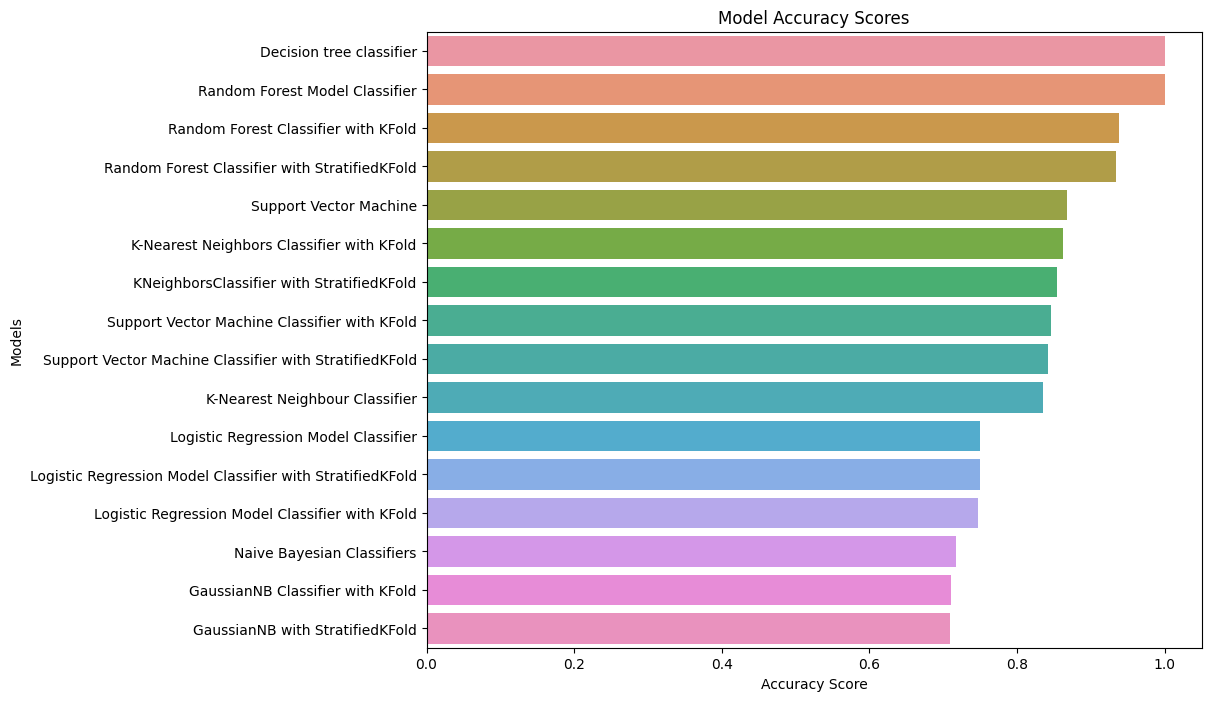

In [134]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Accuracy_score', y='Model', data=models_seen, order=models_seen['Model'])
plt.title('Model Accuracy Scores')
plt.xlabel('Accuracy Score')
plt.ylabel('Models')
plt.show()

#Evaluation on the unseen testing data

#Decision tree classifier

In [135]:
dtc = tree.DecisionTreeClassifier()
dtc

DecisionTreeClassifier()

In [136]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [137]:
dtc_y_pred = dtc.predict(x_test)

In [138]:
dtc_accuracy_score = accuracy_score(dtc_y_pred, y_test)
dtc_accuracy_score

0.6438923395445134

In [139]:
print("Decision Tree classification:")
print(classification_report(dtc_y_pred, y_test))

Decision Tree classification:
              precision    recall  f1-score   support

           0       0.83      0.60      0.70       663
           1       0.46      0.73      0.56       303

    accuracy                           0.64       966
   macro avg       0.64      0.67      0.63       966
weighted avg       0.71      0.64      0.66       966



#K-Nearest Neighbour Classifier

In [140]:
knn_classifier = KNeighborsClassifier(n_neighbors=25)

In [141]:
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [189]:
knn_y_pred = knn_classifier.predict(x_test)

In [143]:
knn_accuracy = accuracy_score(knn_y_pred, y_test)
knn_accuracy

0.7795031055900621

In [144]:
print("KNN classification:")
print(classification_report(knn_y_pred, y_test))

KNN classification:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       534
           1       0.73      0.81      0.77       432

    accuracy                           0.78       966
   macro avg       0.78      0.78      0.78       966
weighted avg       0.79      0.78      0.78       966



# Naive Bayesian Classifiers

In [145]:
gnb_classifier = GaussianNB()
gnb_classifier.fit(x_train, y_train)

GaussianNB()

In [146]:
gnb_y_pred = gnb_classifier.predict(x_test)
gnb_accuracy = accuracy_score(y_test, gnb_y_pred)
print(gnb_accuracy)

0.7287784679089027


In [147]:
print(classification_report(y_test, gnb_y_pred))

              precision    recall  f1-score   support

           0       0.67      0.89      0.77       483
           1       0.84      0.57      0.68       483

    accuracy                           0.73       966
   macro avg       0.76      0.73      0.72       966
weighted avg       0.76      0.73      0.72       966



# K-Nearest Neighbors Classifier with KFold

In [148]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [149]:
cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=kf)

array([0.87256177, 0.84655397, 0.85305592, 0.87516255, 0.86328125])

In [150]:
knn_kfold_accuracy = np.mean(cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=kf))

In [151]:
knn_kfold_accuracy

0.8621230900520157

In [152]:
print("KNN classification with Kfold:")
print(classification_report(knn_y_pred, y_test))

KNN classification with Kfold:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       534
           1       0.73      0.81      0.77       432

    accuracy                           0.78       966
   macro avg       0.78      0.78      0.78       966
weighted avg       0.79      0.78      0.78       966



# GaussianNB Classifier with KFold

In [153]:
cross_val_score(GaussianNB(), x_train, y_train, cv=kf)

array([0.70221066, 0.72691808, 0.68790637, 0.72561769, 0.70833333])

In [154]:
gnb_kfold_accuracy = np.mean(cross_val_score(GaussianNB(), x_train, y_train, cv=kf))

In [155]:
gnb_kfold_accuracy

0.710197225834417

#KNeighborsClassifier with StratifiedKFold

In [156]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [157]:
cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=skf)

array([0.86215865, 0.8426528 , 0.8686606 , 0.84785436, 0.8515625 ])

In [158]:
knn_stratified_accuracy = np.mean(cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=skf))

In [159]:
knn_stratified_accuracy

0.8545777795838753

#GaussianNB with StratifiedKFold

In [160]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [161]:
cross_val_score(GaussianNB(), x_train, y_train, cv=skf)

array([0.710013  , 0.73862159, 0.68010403, 0.69440832, 0.72526042])

In [162]:
gnb_stratifiedkfold_accuracy = np.mean(cross_val_score(GaussianNB(), x_train, y_train, cv=skf))

In [163]:
gnb_stratifiedkfold_accuracy

0.7096814721499782

#Random Forest Model Classifier

In [164]:
rf_classifier = RandomForestClassifier(n_estimators=200)

In [165]:
rf_classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [166]:
rf_y_pred = rf_classifier.predict(x_test)

In [167]:
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(rf_accuracy)

0.7432712215320911


In [168]:
print("Random Forest classification:")
print(classification_report(rf_y_pred, y_test))

Random Forest classification:
              precision    recall  f1-score   support

           0       0.91      0.68      0.78       647
           1       0.57      0.87      0.69       319

    accuracy                           0.74       966
   macro avg       0.74      0.77      0.74       966
weighted avg       0.80      0.74      0.75       966



#Logistic Regression Model Classifier

In [169]:
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train, y_train)
lr_y_pred = lr_classifier.predict(x_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print(lr_accuracy)
print("Logistic Regression Model classification:")
print(classification_report(lr_y_pred, y_test))

0.7391304347826086
Logistic Regression Model classification:
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       515
           1       0.71      0.76      0.73       451

    accuracy                           0.74       966
   macro avg       0.74      0.74      0.74       966
weighted avg       0.74      0.74      0.74       966



#Support Vector Machine

In [170]:
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)
svm_y_pred = svm_classifier.predict(x_test)
svm_acc = accuracy_score(y_test, svm_y_pred)
print(svm_acc)
print("Support Vector Machine Classification")
print(classification_report(y_test, svm_y_pred))

0.7805383022774327
Support Vector Machine Classification
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       483
           1       0.86      0.67      0.75       483

    accuracy                           0.78       966
   macro avg       0.79      0.78      0.78       966
weighted avg       0.79      0.78      0.78       966



#Random Forest Classifier with KFold

In [171]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)

In [172]:
cross_val_score(RandomForestClassifier(), x_train, y_train, cv=cv)

array([0.95584416, 0.91688312, 0.94545455, 0.95064935, 0.93229167,
       0.92708333, 0.95833333, 0.95572917, 0.93229167, 0.91666667])

In [173]:
rf_kfold_accuracy = np.mean(cross_val_score(RandomForestClassifier(), x_train, y_train, cv=cv))
rf_kfold_accuracy

0.9362614989177489

#Logistic Regression Model Classifer with KFold

In [174]:
cross_val_score(LogisticRegression(), x_train, y_train, cv=cv)

array([0.75584416, 0.73506494, 0.71688312, 0.77662338, 0.75260417,
       0.75      , 0.75260417, 0.76822917, 0.75      , 0.7109375 ])

In [175]:
lr_kfold_accuracy = np.mean(cross_val_score(LogisticRegression(), x_train, y_train, cv=cv))
lr_kfold_accuracy

0.7468790584415584

#Support Vector Machine Classifer with KFold

In [176]:
cross_val_score(SVC(), x_train, y_train, cv=cv)

array([0.87012987, 0.82337662, 0.82077922, 0.85714286, 0.8359375 ,
       0.85416667, 0.84895833, 0.88541667, 0.83333333, 0.828125  ])

In [177]:
svm_kfold_accuracy = np.mean(cross_val_score(SVC(), x_train, y_train, cv=cv))

#Random Forest Classifier with StratifiedKFold

In [178]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [179]:
cross_val_score(RandomForestClassifier(), x_train, y_train, cv=skf)

array([0.93758127, 0.92717815, 0.93237971, 0.92977893, 0.93098958])

In [180]:
rf_stratified_kfold_accuracy = np.mean(cross_val_score(RandomForestClassifier(), x_train, y_train, cv=skf))
rf_stratified_kfold_accuracy

0.9347044998916342

#Logistic Regression Model Classifer with StratifiedKFold

In [181]:
cross_val_score(LogisticRegression(), x_train, y_train, cv=skf)

array([0.75162549, 0.75682705, 0.73211964, 0.73081925, 0.77604167])

In [182]:
lr_stratified_kfold_accuracy = np.mean(cross_val_score(LogisticRegression(), x_train, y_train, cv=skf))
lr_stratified_kfold_accuracy

0.7494866168183788

#Support Vector Machine Classifer with StratifiedKFold

In [183]:
cross_val_score(SVC(), x_train, y_train, cv=skf)

array([0.84005202, 0.84395319, 0.84395319, 0.83094928, 0.8515625 ])

In [184]:
svm_stratified_kfold_accuracy = np.mean(cross_val_score(SVC(), x_train, y_train, cv=skf))

#Models Performance Evaluation On Unseen Data

In [185]:
models = pd.DataFrame({
    'Model': ['Decision tree classifier',
              'K-Nearest Neighbour Classifier',
              'Naive Bayesian Classifiers',
              'K-Nearest Neighbors Classifier with KFold',
              'GaussianNB Classifier with KFold',
              'KNeighborsClassifier with StratifiedKFold',
              'GaussianNB with StratifiedKFold',
              'Random Forest Model Classifier',
              'Logistic Regression Model Classifier',
              'Support Vector Machine',
              'Random Forest Classifier with KFold',
              'Logistic Regression Model Classifier with KFold',
              'Support Vector Machine Classifier with KFold',
              'Random Forest Classifier with StratifiedKFold',
              'Logistic Regression Model Classifier with StratifiedKFold',
              'Support Vector Machine Classifier with StratifiedKFold'],
              'Accuracy_score': [dtc_accuracy_score, knn_accuracy, gnb_accuracy, knn_kfold_accuracy, gnb_kfold_accuracy, knn_stratified_accuracy, gnb_stratifiedkfold_accuracy, rf_accuracy, lr_accuracy, svm_acc, rf_kfold_accuracy, lr_kfold_accuracy, svm_kfold_accuracy, rf_stratified_kfold_accuracy, lr_stratified_kfold_accuracy, svm_stratified_kfold_accuracy]
})

models = models.sort_values(by='Accuracy_score', ascending=False)
models

,Model,Accuracy_score
10,Random Forest Classifier with KFold,0.936261
13,Random Forest Classifier with StratifiedKFold,0.934704
3,K-Nearest Neighbors Classifier with KFold,0.862123
5,KNeighborsClassifier with StratifiedKFold,0.854578
12,Support Vector Machine Classifier with KFold,0.845737
15,Support Vector Machine Classifier with Stratif...,0.842094
9,Support Vector Machine,0.780538
1,K-Nearest Neighbour Classifier,0.779503
14,Logistic Regression Model Classifier with Stra...,0.749487
11,Logistic Regression Model Classifier with KFold,0.746879


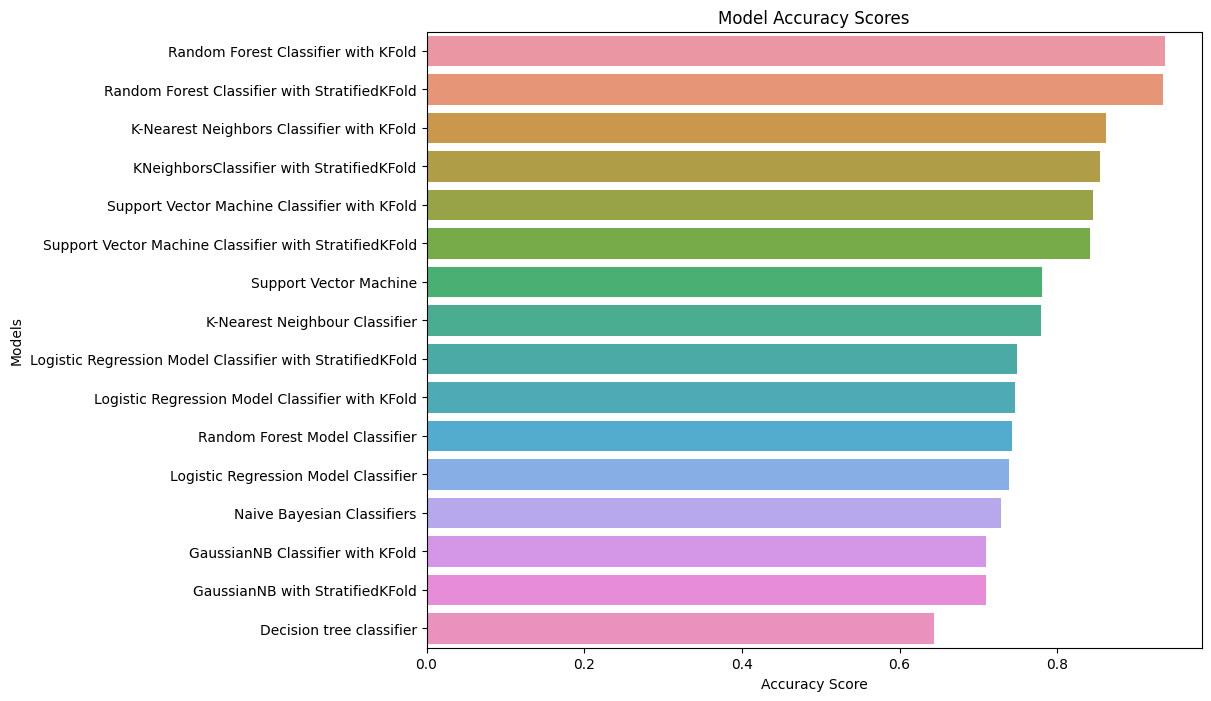

In [186]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Accuracy_score', y='Model', data=models, order=models['Model'])
plt.title('Model Accuracy Scores')
plt.xlabel('Accuracy Score')
plt.ylabel('Models')
plt.show()

###Random Forest Classifier with Kfold with an overall accuracy of 94% was the best model created in this code for classifying the mortality status of patients with breast cancer.